<a href="https://colab.research.google.com/github/fnavab/APS360-project/blob/main/Final_16K_VGG_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#baseline
#DORSA
# Support Vector Machines
import random
import torchvision.transforms as transforms
import torch
import numpy as np
import os
import torchvision
import time
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import svm , metrics




In [ ]:

#Data loading
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
  train_dir = '/content/gdrive/My Drive/16k_vgg_features/train'
 
  train_set = torchvision.datasets.DatasetFolder(train_dir, loader=torch.load, extensions=('.tensor'))


In [ ]:
test_dir = '/content/gdrive/My Drive/16k_vgg_features/test'

test_set = torchvision.datasets.DatasetFolder(test_dir, loader=torch.load, extensions=('.tensor'))

In [ ]:
# val_dir = '/content/gdrive/My Drive/16k_vgg_features/val'
# val_set= torchvision.datasets.DatasetFolder(val_dir, loader=torch.load, extensions=('.tensor'))


In [ ]:
len(train_set)


9004

In [ ]:
# len(val_set)

2978

In [ ]:
len(test_set)

3018

In [ ]:
X_test = np.array([x.detach().numpy() for x,_ in test_set])
y_test= np.array([y for _,y in test_set])
n_samples=len(test_set)
X_test = X_test.reshape((n_samples, -1))

# X_test = X.reshape(X.shape[1]*X.shape[2]*X.shape[3],X.shape[0]).T
# y_test = y.reshape(y.shape[0],)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(3018, 41472)
(3018,)


In [ ]:
#2hours
X_train = np.array([x.detach().numpy() for x,_ in train_set])
y_train= np.array([y for _,y in train_set])

n_samples=len(train_set)
X_train = X_train.reshape((n_samples, -1))


In [ ]:
print(X_train.shape)

(9004, 41472)


In [ ]:
X_val = np.array([x.detach().numpy() for x,_ in val_set])
y_val= np.array([y for _,y in val_set])

n_samples=len(val_set)
X_val = X_val.reshape((n_samples, -1))

# X_val = X_val.reshape(X_val.shape[1]*X_val.shape[2]*X_val.shape[3],X_val.shape[0]).T
# y_val= y_val.reshape(y_val.shape[0],)

In [ ]:
model=svm.SVC(C=1, cache_size=500, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False) 

In [ ]:
#TRAIN
# Fit the model to our training data
import time
t1= time.time()
classifier=model.fit(X_train, y_train)
t2=time.time()-t1
print("training time is" ,t2)



training time is 4146.312613725662


In [ ]:
# from joblib import dump, load
# m=dump(classifier, 'model1.joblib') 
# clf = load('filename.joblib')

NameError: ignored

In [ ]:
# Make predictions
 val_pred = model.predict(X_val)

In [ ]:

def accuracy_score(x,y):

  score=0
  for i in range(len(x)):
    if x[i]==y[i]: 
      score+=1

  return score/len(x)

In [ ]:

score=accuracy_score(val_pred,y_val)
print("SVM VAL:", score)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

# class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)
class_names=["shirt", "Jeans", "Lounge Pants", "Shorts", "Skirt", "Sweater", "Dress", "Jacket"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
plt.rc('figure', figsize=(8, 8))
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [ ]:
testing_predicted= model.predict(X_test)


In [ ]:
score=accuracy_score(testing_predicted,y_test)
print("SVM Test: ", score)

SVM Test:  0.7581179589131876


Confusion matrix, without normalization
[[339  12   5   1  15   1   9   8]
 [ 13 282   1   3  24   5  11  36]
 [  3   3 267  83   1  18   6   0]
 [  0   0  46 288   0  14  22   2]
 [ 11  25   0   1 257  10   7  48]
 [  2   5  10  17   1 314  48   3]
 [  2   3   8   7   3  73 269   1]
 [ 12  43   0   2  38   4   4 272]]
Normalized confusion matrix
[[0.87 0.03 0.01 0.   0.04 0.   0.02 0.02]
 [0.03 0.75 0.   0.01 0.06 0.01 0.03 0.1 ]
 [0.01 0.01 0.7  0.22 0.   0.05 0.02 0.  ]
 [0.   0.   0.12 0.77 0.   0.04 0.06 0.01]
 [0.03 0.07 0.   0.   0.72 0.03 0.02 0.13]
 [0.01 0.01 0.03 0.04 0.   0.79 0.12 0.01]
 [0.01 0.01 0.02 0.02 0.01 0.2  0.73 0.  ]
 [0.03 0.11 0.   0.01 0.1  0.01 0.01 0.73]]


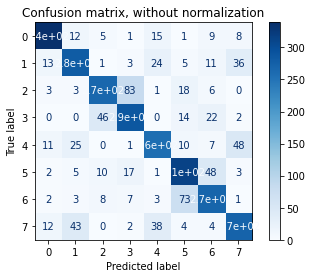

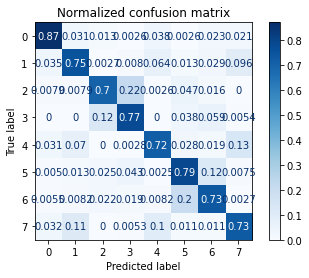

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


test model 2

In [ ]:
model2=svm.SVC(C=100, cache_size=800, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False) 



In [ ]:
#TRAIN
# Fit the model to our training data
import time
t1= time.time()
classifier2=model2.fit(X_train, y_train)
t2=time.time()-t1
print("Training time is",t2)


Training time is 9767.158377885818


In [ ]:
# Make predictions
 val_pred = model2.predict(X_val)

In [ ]:
def accuracy_score(x,y):

  score=0
  for i in range(len(x)):
    if x[i]==y[i]: 
      score+=1

  return score/len(x)

In [ ]:
score=accuracy_score(val_pred,y_val)
print("SVM val:", score)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier2, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# Make predictions
testing_predicted = model2.predict(X_test)

NameError: ignored

In [ ]:
score=accuracy_score(testing_predicted,y_test)
print("SVM Test: ", score)

NameError: ignored

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#val_pred = model.predict(X_val)
class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()